In [1]:
!pip install qiskit --quiet
!pip install qiskit qiskit-aer --quiet
!pip install pylatexenc --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
# Import libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)



In [9]:
# Step 2: Apply gates to demonstrate tensor product states
qc.x(0)  # Apply X gate on qubit 0 → |10>
qc.h(1)  #apply hadamard on qubit 1 (as mentioned in the experiment tasks in github, but not done in the code)


In [10]:
# Step 3: Measure both qubits
qc.measure([0, 1], [0, 1])



In [11]:
# Step 4: Use AerSimulator (new standard in Qiskit 2.x)
simulator = AerSimulator()

# Transpile the circuit for the simulator
from qiskit import transpile
compiled_circuit = transpile(qc, simulator)

# Run the circuit
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get counts
counts = result.get_counts()



Measurement Results: {'00': 516, '10': 508}


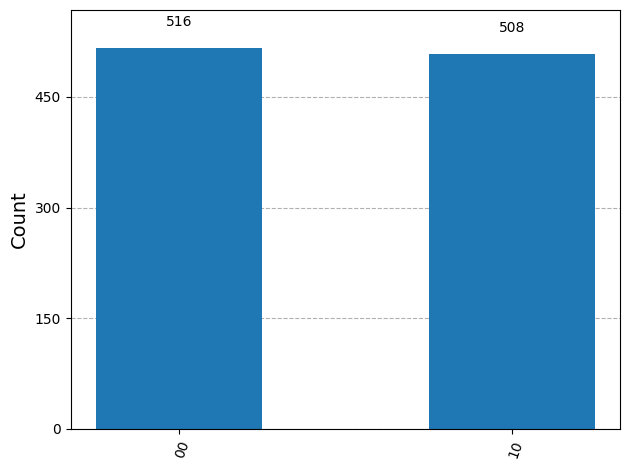

In [12]:
# Step 5: Display circuit and results
print("Measurement Results:", counts)
qc.draw('text')
# plt.show()
plot_histogram(counts)
# plt.show()

Measurement Results: {'01': 242, '11': 245, '00': 266, '10': 271}


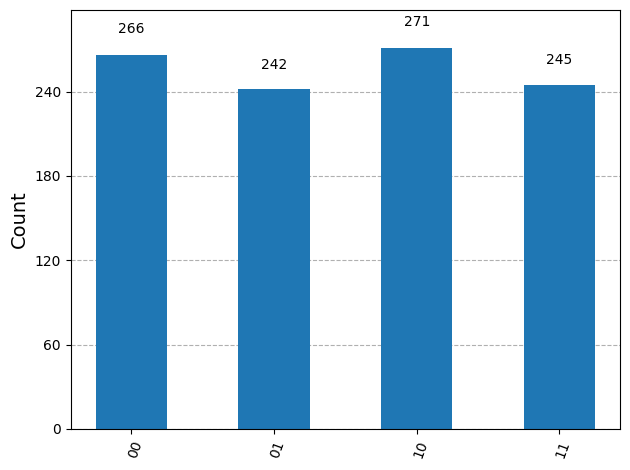

In [15]:
# Task 1 Change Gate Combination

#Apply a Hadamard gate on both qubits and observe the output probabilities.
#What pattern do you notice in the histogram?

qc1 = QuantumCircuit(2, 2)
qc1.h(0)
qc1.h(1)
qc1.measure([0, 1], [0, 1])

compiled_circuit = transpile(qc1, simulator)

# Run the circuit
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get counts
counts = result.get_counts()


print("Measurement Results:", counts)
qc.draw('text')
# plt.show()
plot_histogram(counts)
# plt.show()

# getting equal distribution among the states 00, 01, 10, 11

Measurement Results: {'10': 493, '11': 531}


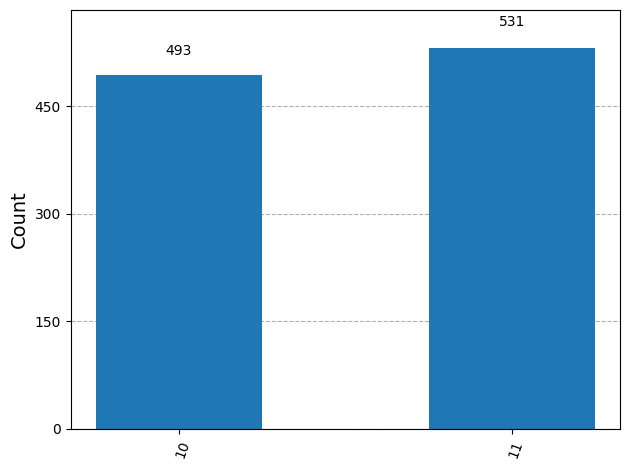

In [23]:
# Task 2
""" Swap Qubit Roles

Apply an X gate on the second qubit instead of the first.
Compare the output with the original circuit. """

qc2 = QuantumCircuit(2, 2)
qc2.h(0)
qc2.x(1)
qc2.measure([0, 1], [0, 1])
compiled_circuit = transpile(qc2, simulator)

# Run the circuit
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get counts
counts = result.get_counts()


print("Measurement Results:", counts)
qc.draw('text')
# plt.show()
plot_histogram(counts)

# if we do change the gates on qubits, now the first qubit in superposition 0 or 1, and the second is 1 (as we applied pauli x) so getting 01 and 11

Measurement Results: {'11': 498, '00': 526}


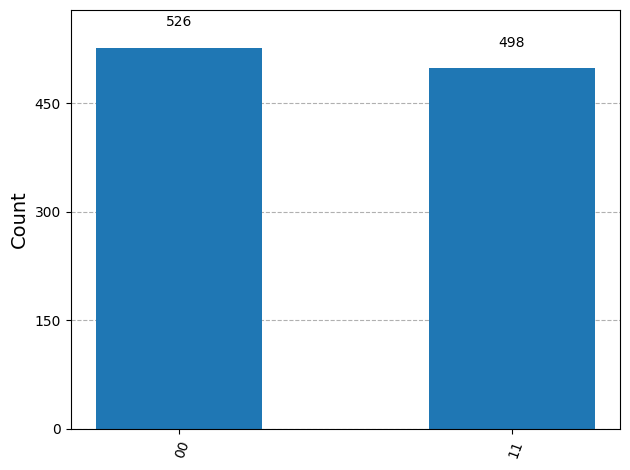

In [25]:
# Task 3
"""Add a CNOT Gate

Add qc.cx(0, 1) after the Hadamard gate.
What kind of state does this create? (Hint: entanglement)"""

qc3 = QuantumCircuit(2, 2)

qc3.h(0)
qc3.cx(0, 1)
qc3.measure([0, 1], [0, 1])
compiled_circuit = transpile(qc3, simulator)

# Run the circuit
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get counts
counts = result.get_counts()


print("Measurement Results:", counts)
qc.draw('text')
# plt.show()
plot_histogram(counts)

# Got entangled states, 00 and 11

Measurement Results: {'11': 2065, '00': 2031}


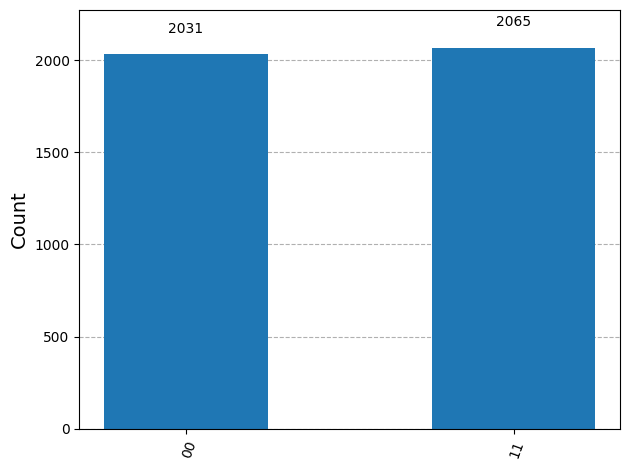

In [30]:
# Task 4
""" Increase Measurement Shots

Change the number of shots from 1024 to 4096 in the execute() function.
Does the distribution become more stable?"""

qc4 = QuantumCircuit(2, 2)

qc4.h(0)
qc4.cx(0, 1)
qc4.measure([0, 1], [0, 1])
compiled_circuit = transpile(qc4, simulator)


# Run the circuit
job = simulator.run(compiled_circuit, shots=4096)
result = job.result()

# Get counts
counts = result.get_counts()


print("Measurement Results:", counts)
qc.draw('text')
# plt.show()
plot_histogram(counts)

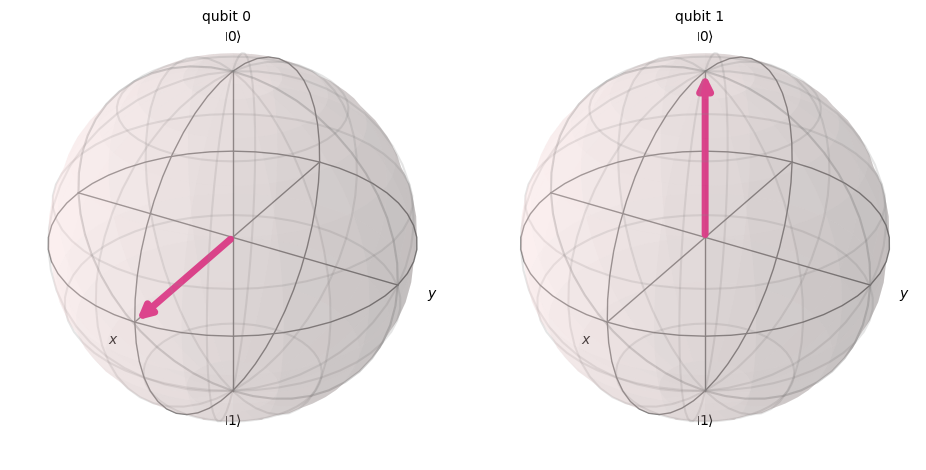

In [32]:
# Task 5
"""Add a New Visualization

Use plot_bloch_multivector to visualize the combined state of both qubits.
Observe how the Bloch sphere changes before and after measurement.
"""

from qiskit.visualization import plot_bloch_multivector

# Create a new circuit without measurements for visualization
qc5_viz = QuantumCircuit(2, 2)
qc5_viz.h(0)

plot_bloch_multivector(qc5_viz)